# Exercise 1

In [116]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## 1)

In [117]:
import random
import networkx as nx

DG = nx.DiGraph()
nodes = [i for i in range(1, 51)]
DG.add_nodes_from(nodes)

for node in nodes:
    num_links = random.randint(1, 4)
    linked_nodes = set()  # To keep track of the nodes that are already connected
    while len(linked_nodes) < num_links:
        # Ensure target is not the same as the node and not already linked
        temp = list(set(nodes) - {node} - linked_nodes)
        if temp:  # Avoid empty list error
            target_node = random.choice(temp)
            DG.add_edge(node, target_node)
            linked_nodes.add(target_node)

# Check the graph
print("Edges:", DG.edges())

    


Edges: [(1, 15), (2, 20), (2, 16), (2, 49), (3, 8), (3, 15), (3, 32), (4, 1), (4, 32), (5, 6), (5, 40), (5, 43), (6, 34), (6, 21), (6, 14), (7, 8), (8, 3), (8, 26), (9, 35), (9, 18), (9, 5), (9, 15), (10, 45), (10, 49), (10, 23), (10, 15), (11, 43), (11, 46), (11, 29), (12, 45), (13, 2), (13, 11), (14, 31), (14, 27), (14, 42), (14, 29), (15, 18), (15, 41), (15, 23), (15, 22), (16, 21), (16, 1), (16, 2), (17, 29), (18, 30), (18, 42), (18, 5), (18, 21), (19, 13), (20, 41), (20, 16), (21, 49), (21, 34), (21, 43), (22, 32), (23, 28), (23, 46), (23, 2), (24, 33), (24, 46), (25, 17), (25, 32), (26, 28), (26, 39), (27, 45), (27, 23), (28, 8), (28, 39), (28, 19), (28, 40), (29, 27), (29, 18), (29, 16), (29, 2), (30, 41), (30, 14), (30, 49), (30, 13), (31, 41), (31, 10), (31, 1), (31, 47), (32, 37), (32, 41), (33, 15), (33, 10), (34, 35), (34, 7), (35, 37), (35, 17), (35, 2), (36, 6), (36, 20), (37, 28), (37, 39), (37, 7), (38, 50), (38, 35), (38, 41), (38, 43), (39, 27), (39, 48), (39, 9), (40

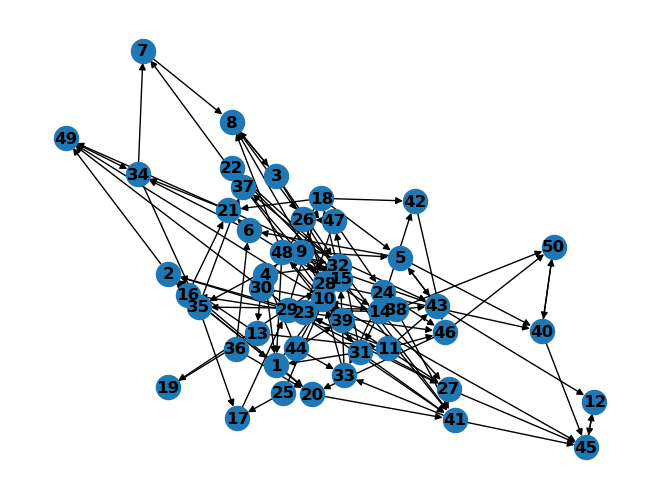

In [118]:
# a)
nx.draw(DG, with_labels=True, font_weight='bold')

In [119]:
# b) adjacency matrix

nx.convert.to_dict_of_dicts(DG)

{1: {15: {}},
 2: {20: {}, 16: {}, 49: {}},
 3: {8: {}, 15: {}, 32: {}},
 4: {1: {}, 32: {}},
 5: {6: {}, 40: {}, 43: {}},
 6: {34: {}, 21: {}, 14: {}},
 7: {8: {}},
 8: {3: {}, 26: {}},
 9: {35: {}, 18: {}, 5: {}, 15: {}},
 10: {45: {}, 49: {}, 23: {}, 15: {}},
 11: {43: {}, 46: {}, 29: {}},
 12: {45: {}},
 13: {2: {}, 11: {}},
 14: {31: {}, 27: {}, 42: {}, 29: {}},
 15: {18: {}, 41: {}, 23: {}, 22: {}},
 16: {21: {}, 1: {}, 2: {}},
 17: {29: {}},
 18: {30: {}, 42: {}, 5: {}, 21: {}},
 19: {13: {}},
 20: {41: {}, 16: {}},
 21: {49: {}, 34: {}, 43: {}},
 22: {32: {}},
 23: {28: {}, 46: {}, 2: {}},
 24: {33: {}, 46: {}},
 25: {17: {}, 32: {}},
 26: {28: {}, 39: {}},
 27: {45: {}, 23: {}},
 28: {8: {}, 39: {}, 19: {}, 40: {}},
 29: {27: {}, 18: {}, 16: {}, 2: {}},
 30: {41: {}, 14: {}, 49: {}, 13: {}},
 31: {41: {}, 10: {}, 1: {}, 47: {}},
 32: {37: {}, 41: {}},
 33: {15: {}, 10: {}},
 34: {35: {}, 7: {}},
 35: {37: {}, 17: {}, 2: {}},
 36: {6: {}, 20: {}},
 37: {28: {}, 39: {}, 7: {}},


In [120]:
# c) Calculate the degree centrality of each node and the average degree of the graph  (use appropriate functions in NetworkX) and display their values

degree_centrality = {node: DG.degree(node) for node in DG.nodes()}
print("Degree centrality of each node:", degree_centrality)

# Calculate the average degree as the mean of the degree values
average_degree = np.mean(list(degree_centrality.values()))
print("Average degree of the graph:", average_degree)

Degree centrality of each node: {1: 5, 2: 8, 3: 4, 4: 3, 5: 6, 6: 5, 7: 3, 8: 6, 9: 5, 10: 7, 11: 4, 12: 3, 13: 4, 14: 6, 15: 9, 16: 6, 17: 3, 18: 7, 19: 2, 20: 5, 21: 6, 22: 2, 23: 7, 24: 3, 25: 2, 26: 4, 27: 5, 28: 7, 29: 7, 30: 5, 31: 6, 32: 7, 33: 5, 34: 5, 35: 6, 36: 2, 37: 5, 38: 4, 39: 7, 40: 5, 41: 8, 42: 3, 43: 7, 44: 4, 45: 6, 46: 6, 47: 4, 48: 6, 49: 5, 50: 4}
Average degree of the graph: 5.08


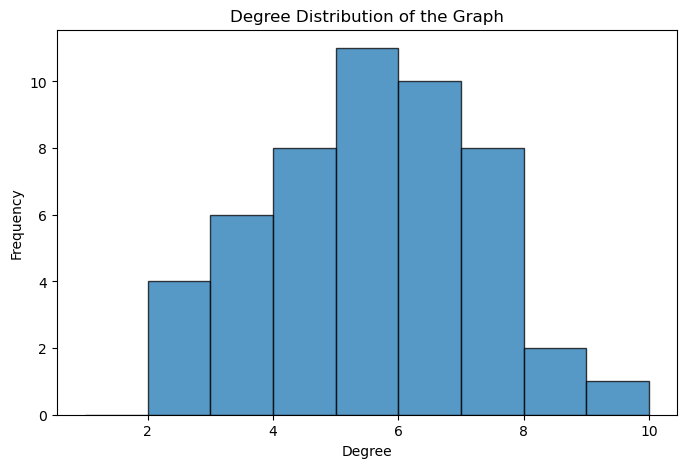

In [121]:
# d) - Draw the degree distribution plot and comment on whether the power-law distribution is fit 

degrees = [d for _, d in DG.degree()]
plt.figure(figsize=(8, 5))
plt.hist(degrees, bins=range(1, max(degrees) + 2), edgecolor='black', alpha=0.75)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Degree Distribution of the Graph")
plt.show()

In [122]:
# e) - Test other centrality measures available in NetworkX and display their values, and store the centrality values in a vector

# closeness
print("Closeness centrality of each node: ", nx.closeness_centrality(DG))
closeness_list = list(nx.closeness_centrality(DG).values())


Closeness centrality of each node:  {1: 0.28305842885099247, 2: 0.3178963893249607, 3: 0.20977934320936495, 4: 0.02040816326530612, 5: 0.2666227781435155, 6: 0.2141271016178492, 7: 0.25199104031856645, 8: 0.27010804321728693, 9: 0.1958603346551891, 10: 0.23750879662209715, 11: 0.17291435402612929, 12: 0.2916666666666667, 13: 0.20871985157699444, 14: 0.19679300291545188, 15: 0.29946761313220943, 16: 0.2649136577708006, 17: 0.20258103241296518, 18: 0.28305842885099247, 19: 0.2141271016178492, 20: 0.25991528686946475, 21: 0.2773592658539926, 22: 0.2308744726941056, 23: 0.28305842885099247, 24: 0.15894819466248036, 25: 0.0, 26: 0.2209974899050529, 27: 0.2445356840961237, 28: 0.26835409488470713, 29: 0.20977934320936495, 30: 0.2198219713417282, 31: 0.22832337354831436, 32: 0.25991528686946475, 33: 0.2649136577708006, 34: 0.26156032033066395, 35: 0.2445356840961237, 36: 0.0, 37: 0.24167561761546724, 38: 0.0, 39: 0.2445356840961237, 40: 0.28714415702586765, 41: 0.3387420541987287, 42: 0.23888

## 2)

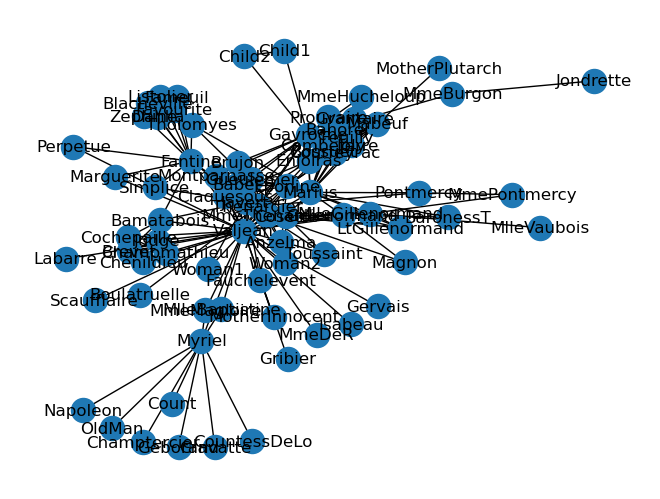

In [123]:
#a) load graph coords from file

import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

# Load the Florentine Families graph dataset
G = nx.les_miserables_graph()
 
nx.draw(G, with_labels=True)

Degree Centrality:
Node Napoleon: 0.0132
Node Myriel: 0.1316
Node MlleBaptistine: 0.0395
Node MmeMagloire: 0.0395
Node CountessDeLo: 0.0132
Node Geborand: 0.0132
Node Champtercier: 0.0132
Node Cravatte: 0.0132
Node Count: 0.0132
Node OldMan: 0.0132
Node Valjean: 0.4737
Node Labarre: 0.0132
Node Marguerite: 0.0263
Node MmeDeR: 0.0132
Node Isabeau: 0.0132
Node Gervais: 0.0132
Node Listolier: 0.0921
Node Tholomyes: 0.1184
Node Fameuil: 0.0921
Node Blacheville: 0.0921
Node Favourite: 0.0921
Node Dahlia: 0.0921
Node Zephine: 0.0921
Node Fantine: 0.1974
Node MmeThenardier: 0.1447
Node Thenardier: 0.2105
Node Cosette: 0.1447
Node Javert: 0.2237
Node Fauchelevent: 0.0526
Node Bamatabois: 0.1053
Node Perpetue: 0.0263
Node Simplice: 0.0526
Node Scaufflaire: 0.0132
Node Woman1: 0.0263
Node Judge: 0.0789
Node Champmathieu: 0.0789
Node Brevet: 0.0789
Node Chenildieu: 0.0789
Node Cochepaille: 0.0789
Node Pontmercy: 0.0395
Node Boulatruelle: 0.0132
Node Eponine: 0.1447
Node Anzelma: 0.0395
Node Woman

C:\Users\mrostami21\AppData\Local\Temp\ipykernel_5720\3992369721.py:59: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='Betweenness Centrality')


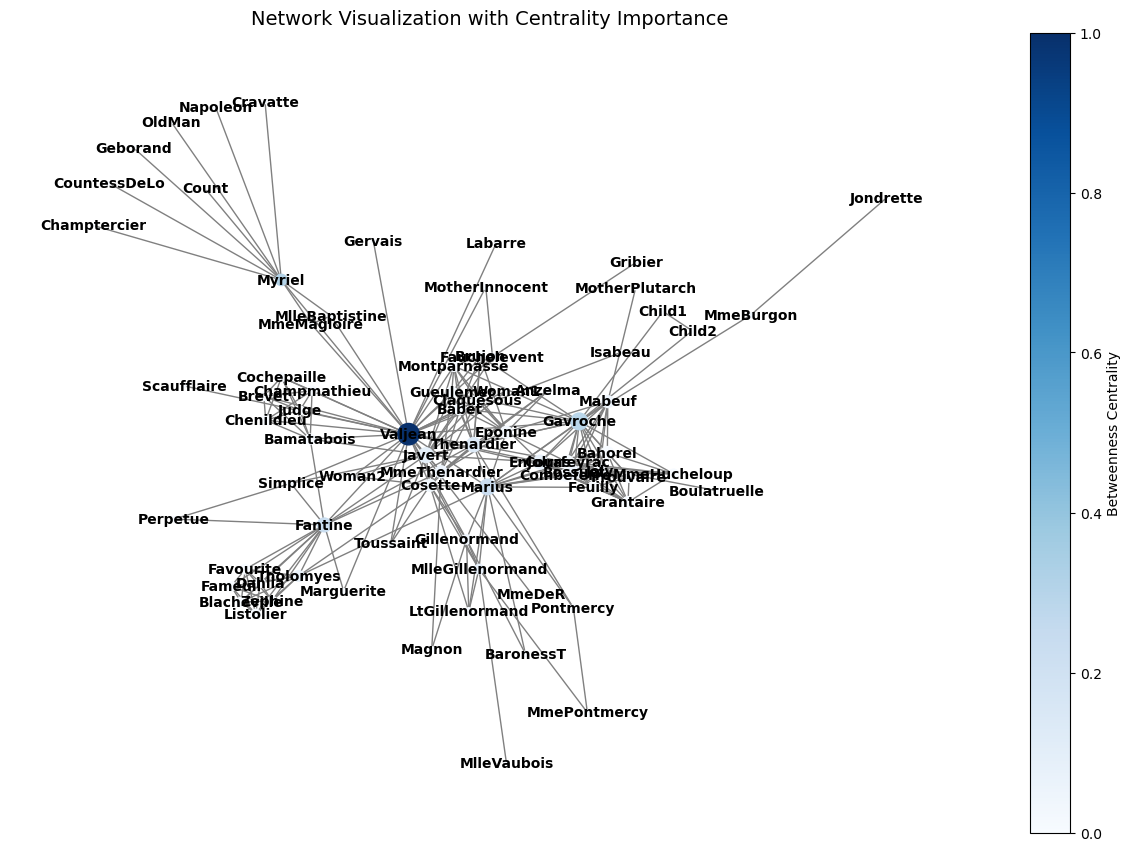

In [124]:
# Step 1: Compute Centrality Measures
# Centrality Measures
# Degree Centrality
degree_centrality = nx.degree_centrality(G)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)

# Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)

# Eigenvector Centrality
eigenvector_centrality = nx.eigenvector_centrality(G)

# Identify most central node in each network
most_central_degree = max(degree_centrality, key=degree_centrality.get)
most_central_betweenness = max(betweenness_centrality, key=betweenness_centrality.get)
most_central_closeness = max(closeness_centrality, key=closeness_centrality.get)
most_central_eigenvector = max(eigenvector_centrality, key=eigenvector_centrality.get)

# Print centrality values
print("Degree Centrality:")
for node, value in degree_centrality.items():
    print(f"Node {node}: {value:.4f}")

print("\nBetweenness Centrality:")
for node, value in betweenness_centrality.items():
    print(f"Node {node}: {value:.4f}")

print("\nCloseness Centrality:")
for node, value in closeness_centrality.items():
    print(f"Node {node}: {value:.4f}")

print("\nEigenvector Centrality:")
for node, value in eigenvector_centrality.items():
    print(f"Node {node}: {value:.4f}")

# Display the most central nodes based on each measure
print("\nMost Central Nodes:")
print(f"Degree Centrality: {most_central_degree}")
print(f"Betweenness Centrality: {most_central_betweenness}")
print(f"Closeness Centrality: {most_central_closeness}")
print(f"Eigenvector Centrality: {most_central_eigenvector}")


# Visualize the network based on centrality importance
# Use degree centrality for node size and betweenness centrality for node color
node_sizes = [500 * degree_centrality[node] for node in G.nodes()]  # Size nodes based on degree centrality
node_colors = [betweenness_centrality[node] for node in G.nodes()]  # Color nodes based on betweenness centrality

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # Positions for nodes in the visualization

# Draw the graph with centrality-based node size and color
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, 
        cmap=plt.cm.Blues, font_size=10, font_weight='bold', edge_color='gray')

plt.title("Network Visualization with Centrality Importance", fontsize=14)
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.Blues), label='Betweenness Centrality')
plt.show()

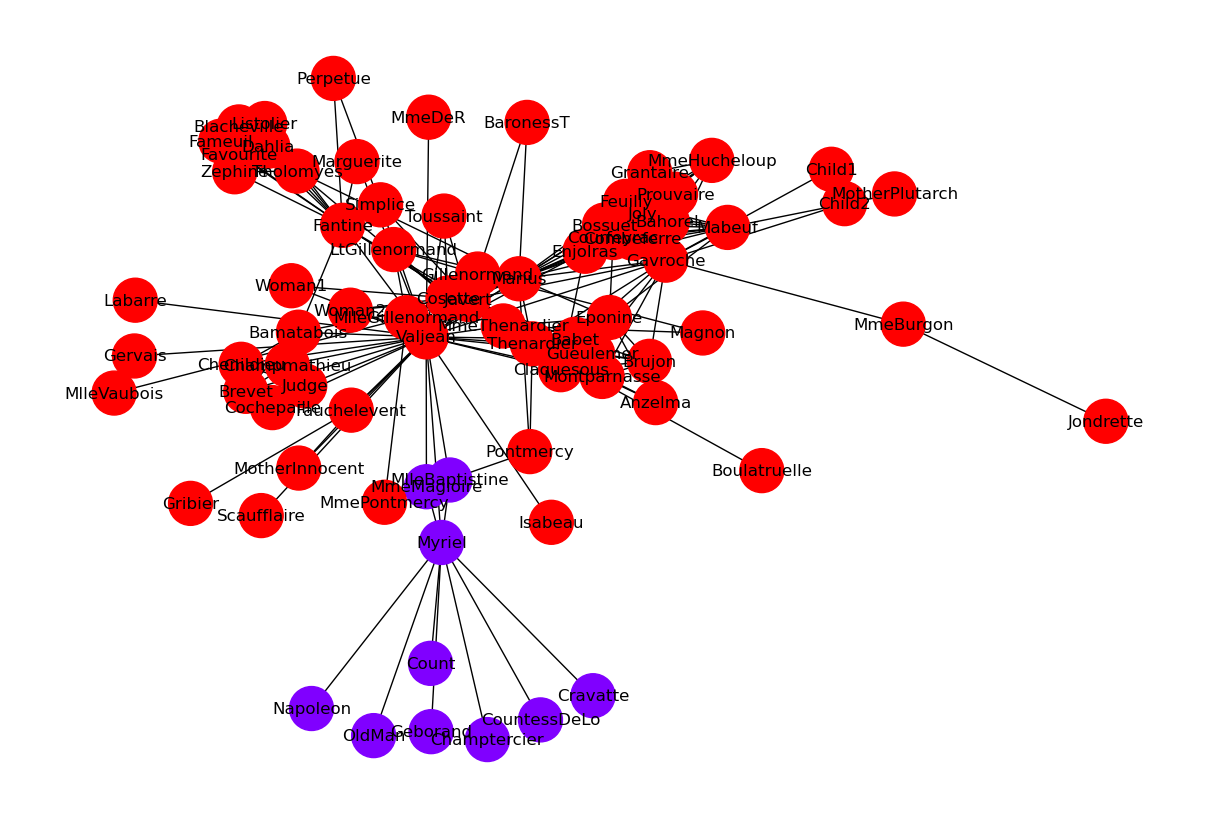

In [125]:
# Step 2: Community Detection using Girvan-Newman algorithm

# Community Detection (Girvan-Newman Algorithm)
def girvan_newman_community_detection(G):
    comp = girvan_newman(G)
    communities = next(comp)  # Get the first division of communities
    return [list(community) for community in communities]

gn_communities = girvan_newman_community_detection(G)

# Assign colors to communities
colors = {}
for i, community in enumerate(gn_communities):
    for node in community:
        colors[node] = i  # Assign a unique community index

# Visualize the network and highlight communities
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)

# Draw nodes with community color
node_colors = [colors[node] for node in G.nodes()]
nx.draw(G, pos, node_color=node_colors, with_labels=True, cmap=plt.cm.rainbow, node_size=1000, font_size=12)



